In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, roc_curve, auc
import os
import sys
from tabulate import tabulate

In [11]:
def calculate_metrics(pred_prob, GT):
    fpr, tpr, thresholds = roc_curve(GT, pred_prob)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    pred_labels = (pred_prob >= optimal_threshold).astype(int)
    #print("prediction: ", pred_labels)
    #print("GT: ", GT)

    # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
    TP = ((pred_labels == 1) & (GT == 1)).sum()
    TN = ((pred_labels == 0) & (GT == 0)).sum()
    FP = ((pred_labels == 1) & (GT == 0)).sum()
    FN = ((pred_labels == 0) & (GT == 1)).sum()
    sensitivity = TP / (TP + FN)
    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)
    auc_score = auc(fpr, tpr)

    results = [
        ["True Positives (TP)", TP],
        ["True Negatives (TN)", TN],
        ["False Positives (FP)", FP],
        ["False Negatives (FN)", FN],
        ["Sensitivity", sensitivity],
        ["Precision", precision],
        ["Specificity", specificity],
        ["AUC", auc_score]
    ]
    # Print results in tabular form
    print(tabulate(results, headers=["Metric", "Value"], tablefmt="fancy_grid"))

    return auc

In [12]:
data = pd.read_csv("/home/ashish/Ashish/UCAN/Results/classification/experiment_3/CV_0/Metrics/epoch_190.csv")
data

,Unnamed: 0,pat_ID,scan_date,GT,prediction,prediction_probability (diagnosis),patient_ID
0,0,NaN,20101115,0,1,0.643294,npr102928239238
1,1,NaN,20101125,1,1,0.577650,npr215862084340
2,2,NaN,20110124,1,0,0.353065,npr215862084340
3,3,NaN,20110204,0,1,0.942932,npr192198005019
4,4,NaN,20110307,0,0,0.001421,npr161070247318
...,...,...,...,...,...,...,...
179,179,NaN,20220214,1,1,0.999999,npr272766092791
180,180,NaN,20220303,1,1,1.000000,npr272766092791
181,181,NaN,20220315,0,0,0.001574,npr216618605686
182,182,NaN,20220511,1,1,0.993020,npr215862084340


In [13]:
calculate_metrics(data["prediction_probability (diagnosis)"], data["GT"])

╒══════════════════════╤════════════╕
│ Metric               │      Value │
╞══════════════════════╪════════════╡
│ True Positives (TP)  │ 128        │
├──────────────────────┼────────────┤
│ True Negatives (TN)  │  48        │
├──────────────────────┼────────────┤
│ False Positives (FP) │   3        │
├──────────────────────┼────────────┤
│ False Negatives (FN) │   5        │
├──────────────────────┼────────────┤
│ Sensitivity          │   0.962406 │
├──────────────────────┼────────────┤
│ Precision            │   0.977099 │
├──────────────────────┼────────────┤
│ Specificity          │   0.941176 │
├──────────────────────┼────────────┤
│ AUC                  │   0.98909  │
╘══════════════════════╧════════════╛


<function sklearn.metrics._ranking.auc(x, y)>

In [13]:
data.GT.value_counts()

GT
1    133
0     51
Name: count, dtype: int64

<Axes: >

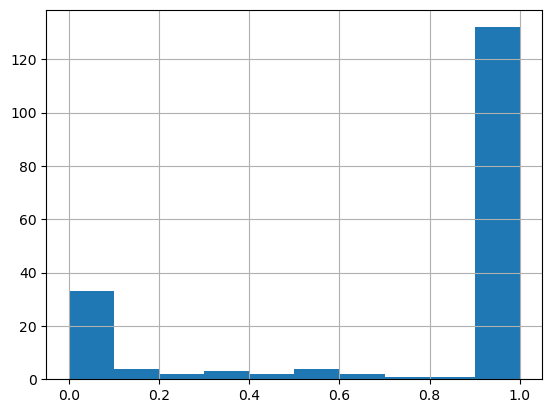

In [12]:
data["prediction_probability (diagnosis)"].hist()

In [8]:
plt.scatter(data['GT'], data["prediction (age)"])

KeyError: 'prediction (age)'

In [4]:
metric_r_squared = r2_score(data["GT"], data["prediction (age)"])
metric_r_squared

0.42363269811419035

In [5]:
metric_mae = mean_absolute_error(data["GT"], data["prediction (age)"])
metric_mae

8.559745699453552

In [9]:
cv_mae_arr = np.load("/home/ashish/Ashish/UCAN/Results/regression/CV_0/MAE.npy")
for i in range(1,10):
    temp = np.load("/home/ashish/Ashish/UCAN/Results/regression/CV_"+str(i)+"/MAE.npy")
    cv_mae_arr = np.column_stack((cv_mae_arr,temp))

In [12]:
cv_mae_arr.shape

(100, 10)

In [16]:
cv_mae_df = pd.DataFrame(cv_mae_arr)
cv_mae_df

,0,1,2,3,4,5,6,7,8,9
0,51.661053,48.158104,51.674908,52.617352,55.328171,51.308605,56.343346,55.107410,54.097870,52.279545
1,43.142235,39.833427,42.676178,44.031742,46.883724,42.839451,47.697330,46.962372,45.799915,43.470936
2,33.354710,31.386930,32.883240,33.960438,36.776108,33.062870,37.441223,36.595123,36.411240,33.704086
3,24.830868,23.659641,24.497389,26.422621,28.304047,24.539446,27.806583,27.303890,27.541706,25.199089
4,17.132412,18.158442,18.267647,20.218649,21.517527,17.344740,18.381001,20.201271,22.732367,19.300184
...,...,...,...,...,...,...,...,...,...,...
95,10.752807,12.237461,11.125750,12.396550,13.261600,39.485367,9.334105,10.946307,11.685050,12.098037
96,10.247961,17.036654,11.745240,10.241927,9.655628,71.689728,9.432148,10.935596,11.764961,13.189807
97,11.452875,16.591263,11.350291,9.978444,15.025595,13.103395,9.445883,12.095978,12.992887,11.825154
98,10.604988,12.258729,17.320435,21.466084,14.135279,12.375731,9.317575,20.422445,13.106354,11.919526


<Axes: >

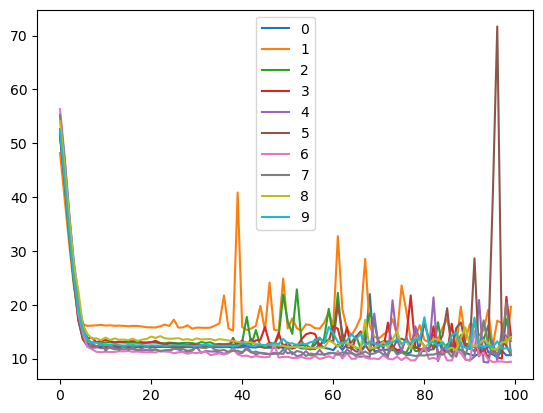

In [17]:
cv_mae_df.plot()

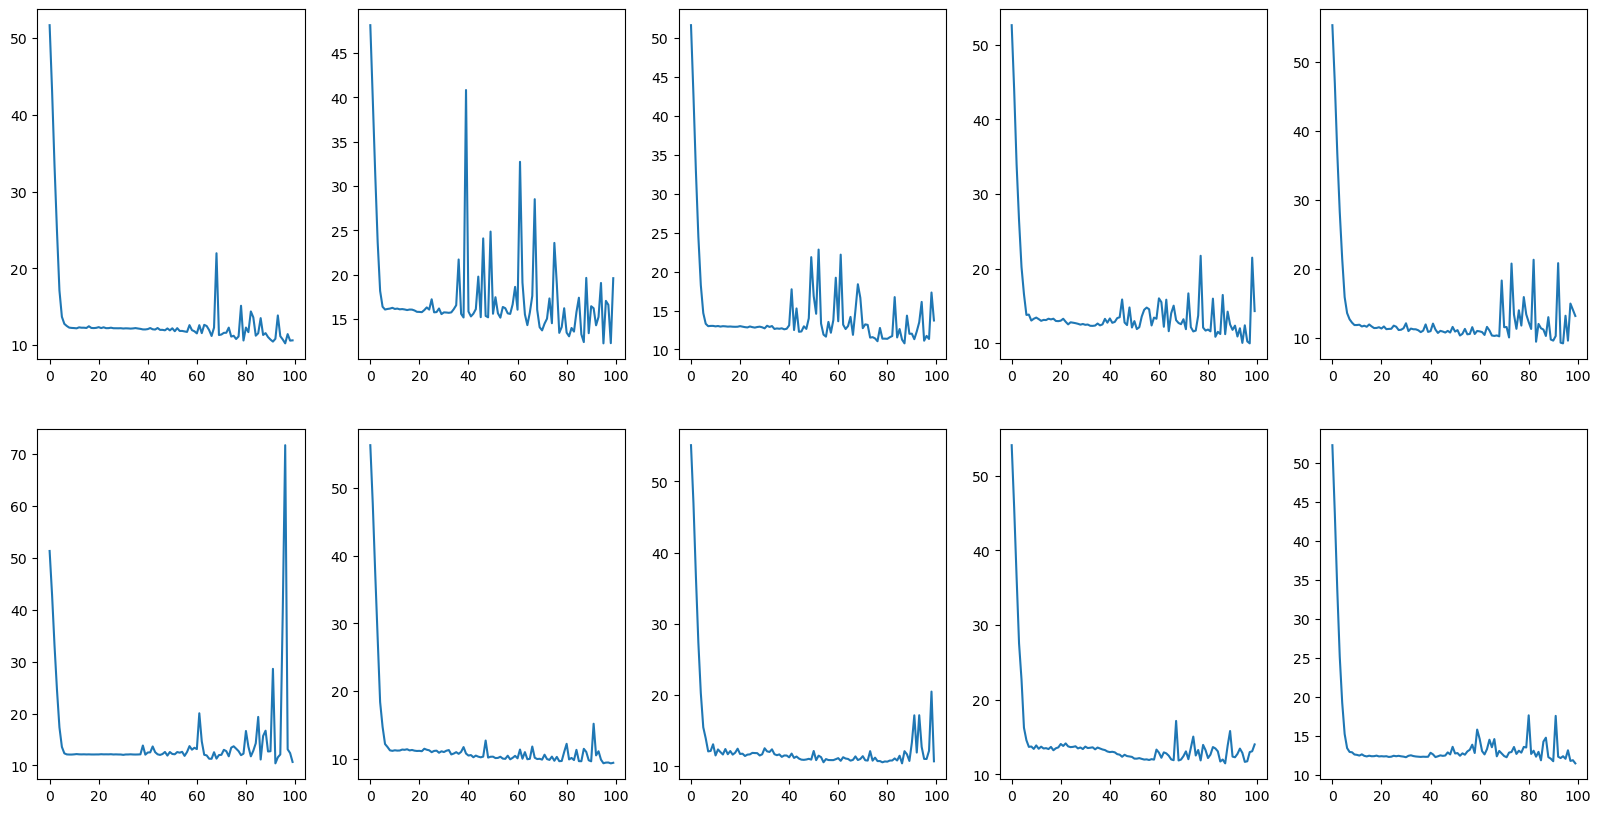

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

cv=0
for i in range(2):
    for j in range(5):
        axs[i, j].plot(range(100), cv_mae_df.loc[:,cv].values)
        cv += 1
plt.show()

In [29]:
df = pd.read_excel("/home/ashish/Ashish/UCAN/dataset_for_training_regression_v2.xlsx")

In [30]:
df.columns

Index(['Unnamed: 0', 'patient_ID', 'scan_date', 'SUV_MIP', 'CT_MIP',
       'SUV_bone', 'CT_bone', 'SUV_lean', 'CT_lean', 'SUV_adipose',
       'CT_adipose', 'SUV_air', 'CT_air', 'patient_age',
       'incorrect_projection'],
      dtype='object')

<Axes: >

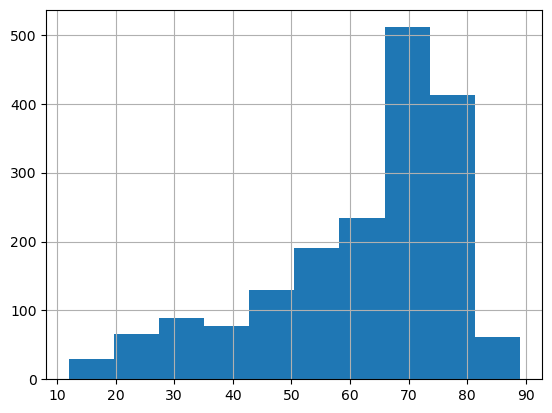

In [31]:
df['patient_age'].hist()

In [19]:

cv_auc_arr = np.load("/home/ashish/Ashish/UCAN/Results/classification/experiment_3/CV_0/AUC.npy")
for i in range(1,4):
    temp = np.load("/home/ashish/Ashish/UCAN/Results/classification/experiment_3/CV_"+str(i)+"/AUC.npy")
    cv_auc_arr = np.column_stack((cv_auc_arr,temp))

In [20]:
cv_auc_arr.shape

(200, 4)

In [23]:
cv_auc_df = pd.DataFrame(cv_auc_arr)
cv_auc_df

,0,1,2,3
0,0.588530,0.654310,0.635269,0.627583
1,0.645806,0.713506,0.689021,0.679612
2,0.699985,0.746408,0.702459,0.702265
3,0.702934,0.771264,0.723124,0.699900
4,0.722837,0.786351,0.736182,0.719816
...,...,...,...,...
195,0.979655,0.955172,0.920892,0.954195
196,0.982751,0.959339,0.960066,0.980583
197,0.976559,0.972845,0.941050,0.972367
198,0.771488,0.971983,0.764199,0.975728


<Axes: >

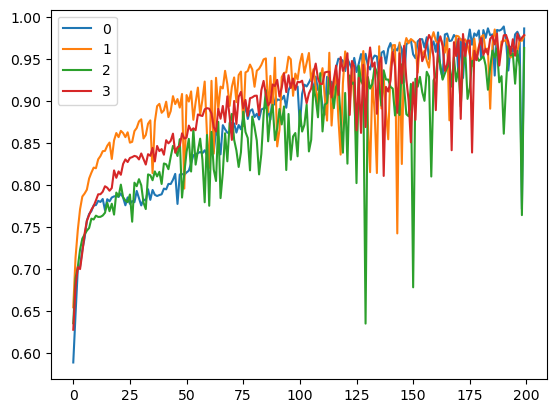

In [25]:
cv_auc_df.plot()

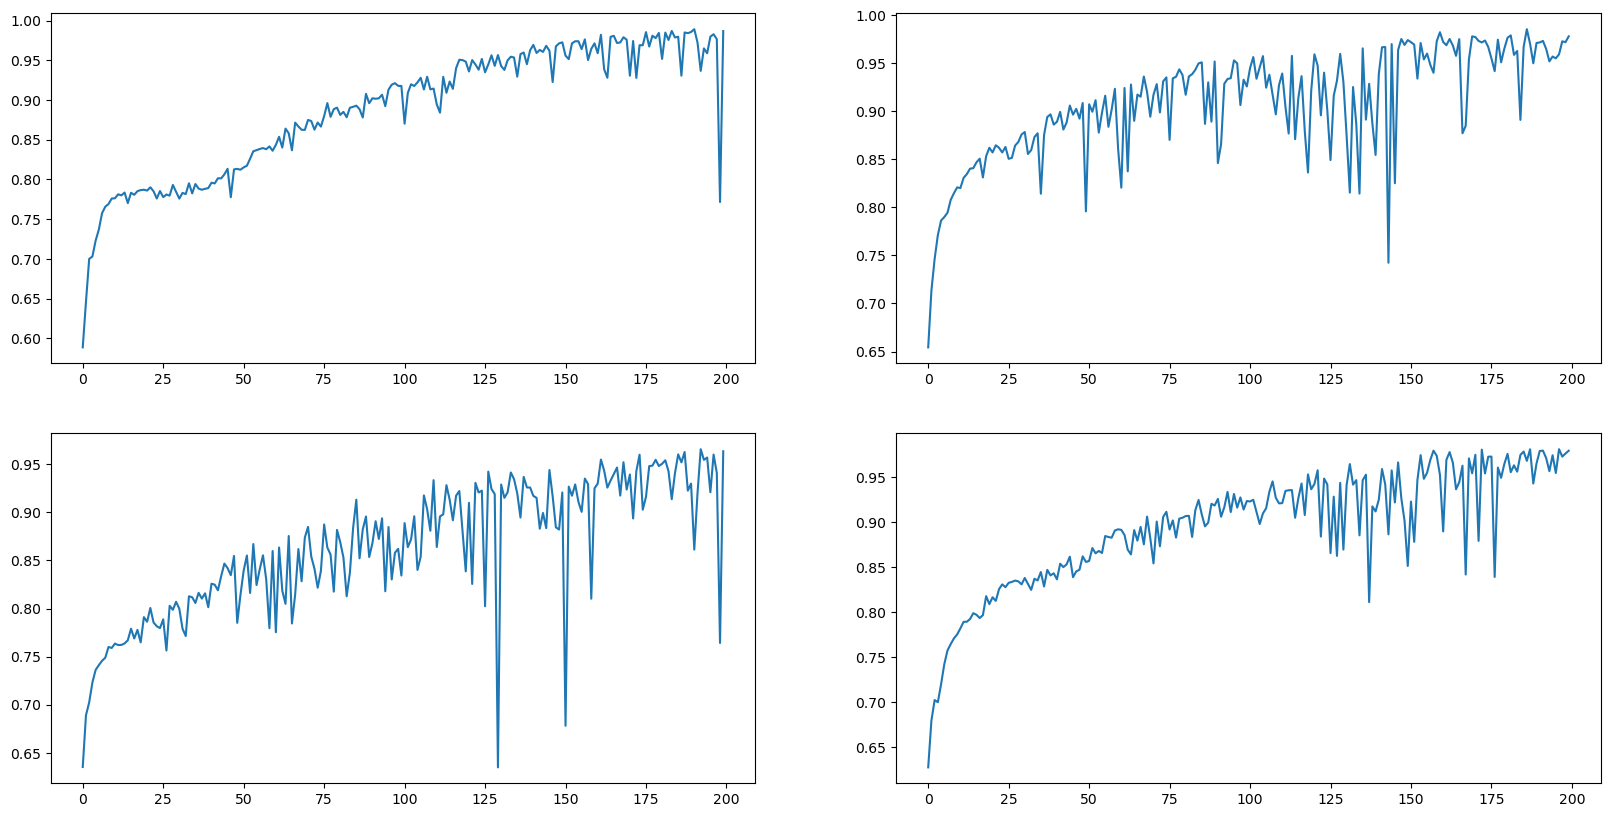

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

cv=0
for i in range(2):
    for j in range(2):
        axs[i, j].plot(range(200), cv_auc_df.loc[:,cv].values)
        cv += 1
plt.show()